<a href="https://colab.research.google.com/github/gbiamgaurav/Feature-Engineering/blob/main/Outliers_and_its_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Which Machine Learning Models are sensitive to Outliers !

1. Naive Bayes Classifier -- Not Sensitive 
2. SVM -- Not Sensitive 
3. Linear Regression -- Sesitive 
4. Logistic Regression -- Sensitive
5. Decision Tree Regressor or Classifier -- Not Sensitive
6. Ensemble (Random Forest, XGB, Gradient Boosting) -- Not Sensitive 
7. KNN -- Not Sensitive
8. KMeans -- Sensitive
9. Hierarichal Clustering -- Sensitive
10. PCA -- Sensitive
11. Neural Networks -- Sensitive

In [3]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv"

In [5]:
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.Age.isnull().sum()

177

In [7]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


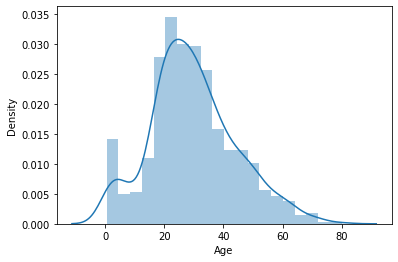

In [9]:
sns.distplot(df.Age.dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


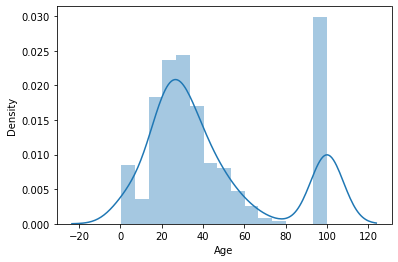

In [10]:
sns.distplot(df.Age.fillna(100))

#### Gaussian Distribution

Text(0, 0.5, 'No of passenger')

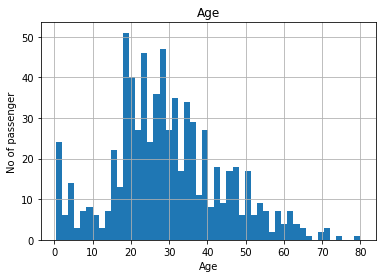

In [13]:
fig = df.Age.hist(bins=50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('No of passenger')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


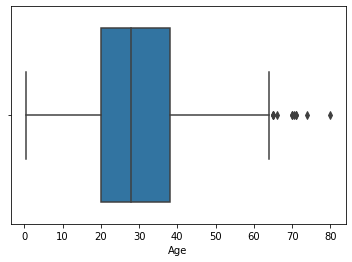

In [16]:
sns.boxplot(df['Age'])

In [17]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
## Assumming Age follows a Gaussian Distribution, we will calculate the boundaries which differentiates the outliers

df['Age'].mean()

29.69911764705882

In [20]:
upper_boundary = df['Age'].mean() + 3*df['Age'].std()
lower_boundary = df['Age'].mean() - 3*df['Age'].std()

In [23]:
print(upper_boundary), print(lower_boundary), print(df['Age'].mean())

73.27860964406094
-13.880374349943303
29.69911764705882


(None, None, None)

In [24]:
## Lets compute the IQR to calculate the boundaries

IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)

In [25]:
IQR

17.875

In [30]:
## Extreme Outliers

lower_bridge = df['Age'].quantile(0.25) - (IQR*3)
upper_bridge = df['Age'].quantile(0.75) + (IQR*3)

In [31]:
print(lower_bridge), print(upper_bridge)

-33.5
91.625


(None, None)

#### If the features is Skewed

Text(0, 0.5, 'No of passenger')

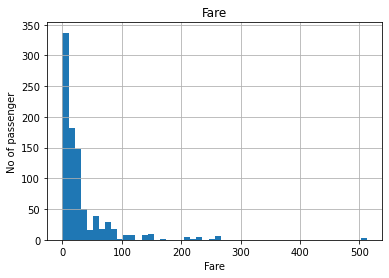

In [33]:
fig = df.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('No of passenger')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


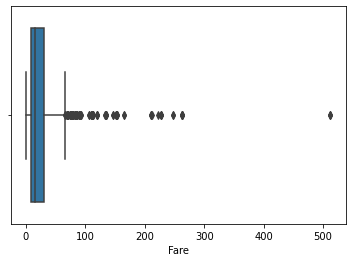

In [34]:
sns.boxplot(df['Fare'])

In [35]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [36]:
df['Fare'].mean()

32.204207968574636

In [37]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [40]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*1.5)

In [41]:
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [42]:
## Extreme Outliers

lower_bridge = df['Fare'].quantile(0.25) - (IQR*3)
upper_bridge = df['Fare'].quantile(0.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [43]:
df = df.copy()

In [44]:
df.loc[df['Age'] > 73, 'Age'] = 73

In [47]:
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [48]:
df.loc[df['Fare'] >=100, 'Fare'] = 100

In [50]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Text(0, 0.5, 'No of passenger')

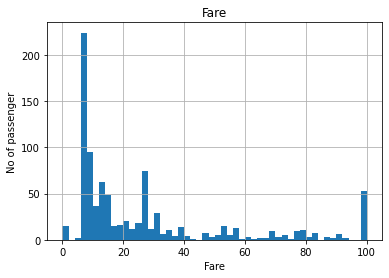

In [51]:
fig = df.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

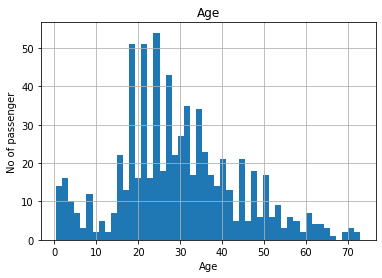

In [52]:
fig = df.Age.hist(bins=50)
fig.set_title('Age')
fig.set_xlabel('Age')
fig.set_ylabel('No of passenger')

In [53]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(df[['Age', 'Fare']].fillna(0), df['Survived'], test_size=0.3)

In [54]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [56]:
y_pred = logit.predict(X_test)
y_pred1 = logit.predict_proba(X_test)

In [59]:
from sklearn.metrics import accuracy_score, roc_auc_score
print("accuracy_score: {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test, y_pred1[:,1])))

accuracy_score: 0.6865671641791045
roc_auc_score: 0.7362390739428302


In [77]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [78]:
y_pred = rf.predict(X_test)
y_pred1 = rf.predict_proba(X_test)
print("accuracy_score: {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test, y_pred1[:,1])))

accuracy_score: 0.6194029850746269
roc_auc_score: 0.6774450744153082
